In [1]:
import os
import re, collections, string
import itertools
import hashlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

# Day 1

In [2]:
with open("data/adventofcode.com_2016_day_1_input.txt") as fid:
    data = fid.read().split(", ")

In [3]:
class Taxi:
    def __init__(self, x0=0, y0=0):
        self.x0 = x0
        self.y0 = y0
        self.x = x0
        self.y = y0
        self.dir = "N"
        self.history = [(x0, y0)]
        
    def change_dir(self, new_dir):
        rose = ["N", "E", "S", "W"]
        if new_dir == "L":
            rose = rose[::-1]
        
        found = False
        for d in itertools.cycle(rose):
            if found:
                print(f"Turning {new_dir}, changing direction from {self.dir} to {d}.")
                self.dir = d
                return None
            if d == self.dir:
                found = True
        
        raise ValueError("Direction not found")
        
    def move(self, m):
        new_dir = re.findall("R|L", m)[0]
        dist = int(re.findall("\d+", m)[0])
        self.change_dir(new_dir)
        
        if self.dir == "N":
            self.y += dist
        elif self.dir == "E":
            self.x += dist
        elif self.dir == "S":
            self.y -= dist
        else:
            self.x -= dist
            
        self.update_history()
        print(f"Moved {dist} blocks {self.dir}.")
        return None
            
    def get_distance(self):
        dist = abs(self.x0 - self.x) + abs(self.y0 - self.y)
        print(f"{dist} blocks away from origin.")
        return dist
    
    def update_history(self):
        h = (self.x, self.y)
        self.history.append(h)

In [4]:
t = Taxi()

In [5]:
for m in data:
    t.move(m)

t.get_distance()

Turning R, changing direction from N to E.
Moved 2 blocks E.
Turning L, changing direction from E to N.
Moved 3 blocks N.
Turning R, changing direction from N to E.
Moved 2 blocks E.
Turning R, changing direction from E to S.
Moved 4 blocks S.
Turning L, changing direction from S to E.
Moved 2 blocks E.
Turning L, changing direction from E to N.
Moved 1 blocks N.
Turning R, changing direction from N to E.
Moved 2 blocks E.
Turning R, changing direction from E to S.
Moved 4 blocks S.
Turning R, changing direction from S to W.
Moved 1 blocks W.
Turning L, changing direction from W to S.
Moved 4 blocks S.
Turning L, changing direction from S to E.
Moved 5 blocks E.
Turning R, changing direction from E to S.
Moved 5 blocks S.
Turning R, changing direction from S to W.
Moved 5 blocks W.
Turning R, changing direction from W to N.
Moved 2 blocks N.
Turning R, changing direction from N to E.
Moved 2 blocks E.
Turning R, changing direction from E to S.
Moved 1 blocks S.
Turning L, changing dire

246

In [6]:
x = [a for a, b in t.history]
y = [b for a, b in t.history]

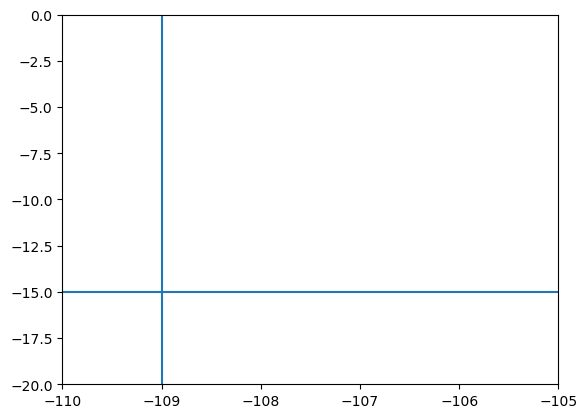

In [7]:
pl.plot(x, y)
pl.xlim(-110, -105)
pl.ylim(-20, 0)
pl.show()

In [8]:
109+15

124

# Day 2

In [9]:
class Keypad:
    def __init__(self, i=0, j=0):
        self.keypad = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
        self.i = i
        self.j = j
    
    def move(self, m):
        if m == "U":
            self.i -= 1
        elif m == "D":
            self.i += 1
        elif m == "L":
            self.j -= 1
        elif m == "R":
            self.j += 1
        
        if self.i < 0:
            self.i = 0
        if self.j < 0:
            self.j = 0
        if self.i > 2:
            self.i = 2
        if self.j > 2:
            self.j = 2
            
    def get_key(self):
        return self.keypad[self.i][self.j]

In [10]:
a = """ULL
RRDDD
LURDL
UUUUD
""".splitlines()

In [11]:
with open("data/adventofcode.com_2016_day_2_input.txt") as fid:
    data = fid.read().splitlines()

In [12]:
key = Keypad()

In [13]:
for line in data:
    for c in line:
        key.move(c)
    print(key.get_key())

7
3
5
9
7


In [14]:
#     1
#   2 3 4
# 5 6 7 8 9
#   A B C
#     D

In [15]:
class Keypad2:
    def __init__(self, i=0, j=0):
        self.keypad = [[0, 0, 1, 0, 0], [0, 2, 3, 4, 0], [5, 6, 7, 8, 9], [0, "A", "B", "C", 0], [0, 0, "D", 0, 0]]
        self.i = i
        self.j = j
    
    def move(self, m):
        if m == "U":
            if self.i > 0:
                self.i -= 1
            if self.keypad[self.i][self.j] == 0:
                self.i += 1
        elif m == "D":
            if self.i < 4:
                self.i += 1
            if self.keypad[self.i][self.j] == 0:
                self.i -= 1
        elif m == "L":
            if self.j > 0:
                self.j -= 1
            if self.keypad[self.i][self.j] == 0:
                self.j += 1
        elif m == "R":
            if self.j < 4:
                self.j += 1
            if self.keypad[self.i][self.j] == 0:
                self.j -= 1
            
    def get_key(self):
        return self.keypad[self.i][self.j]

In [16]:
key = Keypad2(2, 0)
for line in data:
    for c in line:
        key.move(c)
    print(key.get_key())

A
4
7
D
A


# Day 3

In [17]:
df = pd.read_fwf("data/adventofcode.com_2016_day_3_input.txt", names=["a", "b", "c"])

In [18]:
count = 0
for _, (r) in df.iterrows():
    a, b, c = sorted(r)
    if a + b > c:
        count += 1
        
print(count)

983


In [19]:
tri = np.concatenate([df.a.values, df.b.values, df.c.values])
count = 0
for r in zip(tri[::3], tri[1::3], tri[2::3]):
    a, b, c = sorted(r)
    if a + b > c:
        count += 1
        
print(count)

1836


# Day 4

In [20]:
t = "aaaaa-bbb-z-y-x-123[abxyz]"

In [21]:
t.split("-")[:-1]

['aaaaa', 'bbb', 'z', 'y', 'x']

In [22]:
def caesar_cipher(n):
    az = string.ascii_lowercase
    x = n % len(az)
    return str.maketrans(az, az[x:] + az[:x])


ans1 = 0
regex = r'([a-z-]+)(\d+)\[(\w+)\]'
with open('data/adventofcode.com_2016_day_4_input.txt') as fp:
    for code, sid, checksum in re.findall(regex, fp.read()):
        sid = int(sid)
        letters = ''.join(c for c in code if c in string.ascii_lowercase)
        tops = [(-n,c) for c,n in collections.Counter(letters).most_common()]
        ranked = ''.join(c for n,c in sorted(tops))
        if ranked.startswith(checksum):
            ans1 += sid
            decoded = code.translate(caesar_cipher(sid))
            if 'north' in decoded:
                print(decoded, sid)

print(ans1)

northpole-object-storage- 991
409147


# Day 5

In [23]:
import hashlib

In [24]:
key = "reyedfim"

In [25]:
%%time
i = 0
cnt = 0
while cnt != 8:
    i += 1
    h = hashlib.md5(f"{key}{i}".encode())
    if h.hexdigest().startswith("00000"):
        print(h.hexdigest()[5])
        cnt += 1

f
9
7
c
3
5
4
d
CPU times: total: 9.89 s
Wall time: 11.3 s


In [26]:
%%time
i = 0
cnt = 0
code = [""] * 8
pos = 0
while cnt != 8:
    i += 1
    h = hashlib.md5(f"{key}{i}".encode())
    if h.hexdigest().startswith("00000"):
        try:
            pos = int(h.hexdigest()[5])
        except Exception:
            continue
        if pos >= 8:
            continue
        if code[pos] != "":
            continue
        code[pos] = h.hexdigest()[6]
        print(" ".join(code))
        cnt += 1

       7
   d    7
   d  e  7
   d d e  7
8   d d e  7
8  3 d d e  7
8 6 3 d d e  7
8 6 3 d d e 2 7
CPU times: total: 34 s
Wall time: 38.1 s


In [27]:
"".join(code)

'863dde27'

# Day 6

In [28]:
t = """eedadn
drvtee
eandsr
raavrd
atevrs
tsrnev
sdttsa
rasrtv
nssdts
ntnada
svetve
tesnvt
vntsnd
vrdear
dvrsen
enarar
""".splitlines()

In [29]:
with open("data/adventofcode.com_2016_day_6_input.txt") as fid:
    lines = fid.read().splitlines()

In [30]:
for column in range(len("qqskjpax")):
    txt = ""
    for word in lines:
        txt += word[column]
        
    print(collections.Counter(txt).most_common()[-2:])

[('d', 25), ('b', 24)]
[('m', 25), ('h', 24)]
[('m', 25), ('k', 24)]
[('u', 25), ('z', 24)]
[('b', 25), ('e', 24)]
[('e', 25), ('k', 24)]
[('s', 25), ('a', 24)]
[('e', 25), ('o', 24)]


In [31]:
"bhkzekao"

'bhkzekao'

# Day 7

In [32]:
w = 'emzopymywhhxulxuctj[dwwvkzhoigmbmnf]nxgbgfwqvrypqxppyq[qozsihnhpztcrpbdc]rnhnakmrdcowatw[rhvchmzmyfxlolwe]uysecbspabtauvmixa'

In [33]:
tls = re.findall(f"\[(\w+)\]", w)[0]

In [34]:
tls

'dwwvkzhoigmbmnf'

In [35]:
import re
def abba(x):
    return any(a == d and b == c and a != b for a, b, c, d in zip(x, x[1:], x[2:], x[3:]))

lines = [re.split(r'\[([^\]]+)\]', line) for line in open('data/adventofcode.com_2016_day_7_input.txt')]
parts = [(' '.join(p[::2]), ' '.join(p[1::2])) for p in lines]
print('Answer #1:', sum(abba(sn) and not(abba(hn)) for sn, hn in parts))
print('Answer #2:', sum(any(a == c and a != b and b+a+b in hn for a, b, c in zip(sn, sn[1:], sn[2:])) for sn, hn in parts))

Answer #1: 118
Answer #2: 260


# Day 8

In [36]:
with open("data/adventofcode.com_2016_day_8_input.txt") as fid:
    lines = fid.read().splitlines()

In [37]:
class Screen:
    def __init__(self):
        self.screen = np.zeros((6, 50), dtype=int)
        
    def switch_on(self, wide, tall):
        self.screen[:tall, :wide] = 1
        return None
    
    def shift_row(self, pos, n):
        self.screen[pos, :] = np.roll(self.screen[pos, :], n)
        return None
    
    def shift_col(self, pos, n):
        self.screen[:, pos] = np.roll(self.screen[:, pos], n)
        return None
    
    def instruction(self, inst: str):
        if inst.startswith("rect"):
            wide, tall = inst.split(" ")[-1].split("x")
            wide = int(wide)
            tall = int(tall)
            self.switch_on(wide, tall)
        else:
            pos, n = re.findall(r"(\d+) by (\d+)", inst)[0]
            pos = int(pos)
            n = int(n)
            if "row" in inst:
                self.shift_row(pos, n)
            elif "column" in inst:
                self.shift_col(pos, n)
        return None
    
    def pprint(self):
        fig = pl.figure()
        im = pl.imshow(self.screen, vmin=0, vmax=1)
#         fig.colorbar(im, orientation="horizontal")
        pl.show()
        

In [38]:
s = Screen()

In [39]:
for idx, line in enumerate(lines):
    s.instruction(line)
#     if idx % 10 == 0:
#         s.pprint()
    
# s.pprint()

In [40]:
s.screen.sum()

116

In [41]:
"upojflbcez"

'upojflbcez'

# Day 9

In [42]:
txt = """(6x6)AFPLBX(2x3)ZE(53x13)(4x7)ZGQO(2x4)NJ(1x8)M(24x11)(18x7)HMLOASMJNGZHMCEVEX(11x2)(6x6)TRDPQX(157x12)(60x12)(2x3)SB(7x1)FBSAUFK(4x1)NMZK(10x2)RLIIHFEKRY(10x6)GMDUIQDOZJ(71x8)(1x11)N(19x5)EHNAZSRTFYXOZNFTOOQ(6x4)XKARLK(13x1)IRATYZQMJXHAH(4x8)VFUJ(8x6)AOOEHHBF(27x6)(11x9)(5x15)KTTHB(5x6)AELEZ(17x10)AOGNMNTGDJDYEMMEH(7x8)BOIOHRF(6x2)ZKXONV(172x8)(6x5)(1x8)V(17x6)WEVFHKUDETBOZVKIO(2x14)ZI(75x9)(5x5)EXKDZ(4x4)BOGK(10x5)SXYSSOACJR(3x15)FHO(24x10)YBZPMZIPUCEIYNGYAUPVFOKB(43x3)(13x2)MERJWKSXBIEKP(2x4)CR(4x5)DFDQ(2x15)ZM(89x5)(43x6)(16x8)RIGCVPPOSBRJSJCB(2x9)XI(1x11)M(2x8)QT(8x6)(3x8)XVC(20x15)SBWQFWQWPQHXZXDWSXIR(4393x15)(25x5)TEAACSAHWYWPYJZEPDIHUMIPB(1026x1)(1x7)K(768x7)(388x3)(113x9)(70x11)(12x10)HDEPKSMDLHAX(2x5)RU(29x13)BIOENKVYNENIFNCSWNZIJGCZXBUVF(3x1)JRO(30x2)(11x9)NCTAXULXPBY(1x5)K(2x7)WQ(76x10)(13x7)UDCLRUKNLOAEL(17x10)(11x8)TLRICJOXJPO(26x13)HBPYKHNJRGJHSXUFGJAAHODUDG(177x13)(58x14)(17x15)MWIVHZEKJKLDWPYEN(7x5)MLNEAXO(1x2)F(10x2)GMUPKWMFFU(51x13)(2x12)TG(29x1)CJZOBLWTYDISRYKVWHJKRDDNHSABE(3x5)VDV(36x7)(7x2)JOQSKQM(10x4)SSQKRCQCYQ(3x3)HRU(7x6)(2x7)CG(271x13)(14x12)TPDOYGCYWKAOQU(223x5)(15x1)WKAGRMIPECLUUPH(68x2)(10x15)VRFPOQRGAW(5x6)MEVXZ(11x13)INACCUVBTIP(1x12)M(10x5)ECIALUKBGQ(29x5)LDVPFVNKSBWVZCJUOLIJZHYNOXLHZ(42x9)(11x14)HKDQCRYGEWD(3x5)DDV(10x8)KRRTDJEMKB(39x8)(13x8)IWLYAVYPLTFBF(14x8)PMPTEZESXEQSYM(13x12)SYBXETSKQLUYU(12x5)(7x3)(2x4)FH(69x10)(63x7)(6x4)RVKPXJ(46x1)(19x14)YCVJOBRSCSVKJJWUBJI(4x6)VUOI(5x15)WIFPK(237x15)(230x7)(51x15)(45x5)(9x11)BUZLRCBIY(2x5)ZZ(8x6)DNEOUHUT(5x2)QFOTV(164x11)(30x14)YOCHTVEXSZYELWOMGCXOISALUWCWTJ(8x15)QIINZKAI(1x1)F(88x5)(8x1)SIZRWUDB(49x7)AWSFCZFEGKBUKONNMQQSIGHMKQFAMUEBLTQFGEZLMUTNWXOCH(1x12)T(8x7)ZOTXRWXA(7x15)HGGWNTM(1484x6)(691x6)(53x6)(2x14)IB(39x3)ASFVSLNNXYBFSSOPECXZOEVPRIGJCTMLWCFSVTZ(72x4)(66x1)(38x7)(17x7)DXTENHWTOXYZMQFLF(2x2)OG(3x6)ATG(16x1)IBSUFIGHTLDMGRZE(9x5)DKNZYEYGJ(288x11)(165x9)(16x4)MDBGELYWXPUTRCEZ(14x14)PHSIPUMMXOMBWF(57x9)(13x13)WIVFVHXPHBTWO(4x6)XSWT(9x5)CPSCDHORP(1x2)M(3x8)JJE(12x4)ZADOSQULBZRT(34x10)EUJRPXWESNMXYDAUHFPLCLOYZCUKOSDPTZ(108x12)(10x13)CJVGTNJFUE(37x10)LDQKJRVQQKTVRBMNRIFDMZBJOQZKJSBZPWWLQ(24x5)FXOCHIJNODJUEGYPZYTIADPF(11x4)FUNCENOZTTS(237x7)(106x6)(9x6)SBSWNIMDC(58x11)(6x8)VJZVTK(5x2)QRAXJ(3x2)KAC(9x11)EWJHYTQXW(9x2)TSWWFYDYC(21x2)EXPZWOLLWOALTQGUZXTUS(117x2)(6x8)TLGPET(3x7)GBW(39x6)(32x10)VGSULYHYHHFVDEIQYAXVUGNDVDCDGANM(46x13)(14x6)VYXTECTXLBJFWZ(12x6)IFRBYZIXFTOC(2x14)HF(14x7)(8x10)AFPWFLXJ(726x6)(160x5)(45x13)(1x4)K(8x2)(2x14)WF(19x11)EDIZTWWQBGFLFXEWHFA(17x10)WIGPDKRTBSOJTFXKY(15x2)ADLZSCNVATBMRBV(34x12)IVGRGESBMMRDBWKCIDCLYWVXANHCWQQEQL(15x12)WGFAYDKOFYOZWHU(464x6)(42x14)(35x12)(5x12)TVUTT(2x13)RK(2x10)RC(3x1)LXD(20x1)(14x6)OJOAQUIEOIUVXE(152x6)(16x1)IIDXUSCZEOEHDVIP(98x6)(18x4)AFGQQZEGERPRXYXDTI(15x13)UPZDHXFYQRGBNBZ(45x10)GEJVEKLGJBCATXONOSOJWLLZESRRGSLNTRDKDKJKNAOYC(20x4)SHUJGLTDVLVMUBGUYCCQ(202x2)(29x4)(23x9)ZNKNMTBUBYEMBVCDGNHMZRB(123x6)(8x8)QCPLTVYD(2x5)YQ(13x3)XFKTLSHCQAPID(30x1)DRTIAMQDRSIQQIZKAXMVZDLCRHYVWS(41x11)SLVGMXLAUIETLVILQABUODBTBFZZHOSFRUJKLQPSE(21x8)(4x9)EXQY(6x13)QAFDCI(4x10)XYII(15x5)VZTRXIMIYNGDQKZ(75x4)(6x11)RFOKPH(2x15)ZH(10x15)ZDWQPCMXCQ(32x7)DJRJDFDSGKZBQZMNIKCOLHWSLYCQXEKH(1x14)H(27x2)(21x3)GCUQEXKSVPNXNOTUOZBWR(1828x7)(1107x13)(550x1)(177x11)(30x15)(1x13)T(3x1)MTN(9x14)EDQQAMGTE(39x4)(14x2)NPINNXFQEZICDQ(13x3)QYHEGLYNFPMMQ(88x13)(22x13)GLVPCEBDDABCPDHXXXZDTT(1x3)A(1x3)J(40x14)LPRDKSIGCUXWPZIPZKUGMNGLLGQHFDNXLHRNVPEM(14x7)TPYKUDKFRLVPPF(135x10)(10x7)GWRRITBPFN(5x5)ECPKJ(50x6)(4x10)DORU(1x12)S(9x3)YQFICKCXH(7x3)ZJFMLPD(2x9)HK(3x7)HWQ(39x6)NPYOZFXSQJMVHMGSMHMKBOQLXAUVSZZRUGFOIUL(122x13)(7x5)WQPCNYP(35x14)(21x4)UIBUUSAWFXCJOAAOQYWKD(3x3)VKI(17x11)YCWPDYLDDKIDATXKY(38x4)(4x2)FPPY(16x8)ETEICDHDZBPINNTA(2x4)RR(66x3)(59x15)(9x10)WLRKNQFPX(4x3)OCJF(8x1)QSOOLMPP(4x6)DKRV(8x5)PBRRNJTD(377x10)(88x7)(81x11)(17x8)RPFNVFZNWFZCEDXYR(3x3)DMM(6x1)ZOBJHV(1x10)S(26x3)MLOILGCEQPKNQPYBABPWRMGTCU(13x2)KNRNZAANDYZVG(2x15)UR(1x5)Y(242x12)(144x11)(8x6)HUOOXYEN(35x2)HGPTAFHSMKKPDMGARWVNYVCJWMZETRIJNXM(4x4)TJDP(28x5)UKOZMKRXJLSBZJRRVABSWSIEIDMC(40x14)HCTILCVYQXWNUZHZAZGCXKXRZDHFNTKISPMUOLAD(8x6)(3x9)NXB(44x15)(3x13)GZF(9x7)XCHQMMOXC(2x8)EO(8x12)GTHAWKXZ(3x4)TFJ(12x7)JOAKSXHVNNNX(157x14)(150x8)(11x13)(5x15)GVWWA(125x1)(14x12)OALPJNHTLRQGRJ(24x15)EEWRKUJFKQFVCFVVGRNXRNMO(23x12)SWMZOIWGOVLKIRKBHSIAYFY(16x6)VQBYRVNJQKQZUXYC(15x8)SRQFUMLAWWDVVCY(166x3)(8x4)ROOZHNPS(1x5)G(140x3)(5x11)NNJCA(122x8)(12x10)ACNODOEIPNFS(36x7)(2x3)HI(9x12)WVTUTLVXH(1x14)L(1x11)R(28x13)TFKQTKVMFXBNHUCUGXXBKSPBSYOI(2x8)RL(13x5)(8x5)BMGHNIWS(80x2)(4x5)CLIN(64x13)(12x7)PUIYXOSOYXRH(23x9)(1x14)J(1x10)L(3x12)BRJ(11x3)(5x12)LIYCT(446x9)(1x14)A(128x1)(86x9)(15x1)XKXMQLFUXTGSIUI(36x8)UUZAZBICEWZOHBKMLKFMOPRGDNIIXYZIRYBO(16x10)(3x1)DCZ(2x10)RG(15x1)TVCSLSBSQOEZORE(9x12)(4x5)FOWX(67x7)(27x3)(20x11)QHEAAUEGZRHVTYXMHWGD(27x14)(1x6)C(14x15)EHUGFRTEFCLPYB(223x13)(192x1)(27x13)(8x1)ECDZKCJY(8x12)HNTSWDYP(14x1)SMPGAHCDMTHRPF(43x6)(2x9)QY(3x1)NGD(7x11)QBFWGLX(3x4)JCI(1x10)L(31x2)(3x10)NIH(16x2)SFTKKDPDSTPUVOQA(46x3)(1x11)N(19x13)RGTNKUTACWUHOBKHPAF(2x9)JH(1x5)D(18x5)ELEQYVKHCZWCPDKGET(4430x14)(6x6)SGLJXG(1303x14)(8x3)PBGTOJDF(472x9)(1x14)U(299x2)(71x12)(2x14)UZ(13x11)(7x13)OYMYFOR(22x12)MLXGMMRGPSASXFVDRWWYGU(9x5)(3x14)NFY(96x1)(22x8)XALEFGLORBLTMHIWSARRDS(24x12)(17x14)QARJVLVCJVIJEJOLE(8x13)(3x8)HPO(16x14)UMCNXKMHFCKLLSTQ(96x11)(3x8)IYF(82x5)(3x1)OBQ(30x14)UJYENTNVNGKUFYSGTPROKDUVXVAAAP(18x14)OFJNLBOUNGILMQMTBO(7x2)UJJJZAX(3x2)JTL(2x10)YM(112x1)(83x7)(50x6)(4x11)TSPK(2x2)AU(6x15)XSSYWL(3x12)DCS(6x13)OIDFMJ(1x14)N(13x12)EEZZPERSDPKOT(17x7)SBEJBRDQAVFLLCNUW(3x11)ZGN(25x3)(18x15)CSVBGEAPPCXHRXBYIK(1x4)M(664x4)(337x14)(99x5)(12x11)QQXQUTFBUNIV(7x7)ALTZFYQ(15x4)VBFROTJMHRPGBJW(40x12)(23x8)UTBYEFQMPFIEXVVLZXVDWWJ(6x2)BMJTZF(4x3)NRUY(6x12)TKXPAM(62x6)(3x15)RQS(1x5)K(41x8)(12x9)NJRYDQRLHCNB(17x7)AEPPXIYSGQCVSPVMF(135x14)(72x7)(2x9)FB(4x10)OGAV(26x6)QXHCWFQUDQKXVJJGIZDZLTBIKY(3x10)CXD(9x5)IDBZUGYPE(14x2)KYYCJLAYHWQQVD(30x13)(7x11)YXUUJZQ(11x3)YRHZXTLPZJF(311x14)(49x6)(42x12)BLCUHNHXNFKMUKOHBMVPXMURVUESFYMANQKXIQEVOG(79x1)(73x8)(5x3)JGNSI(20x11)DVUPOLXLRCUFVJYHXWJV(15x2)OPIKHDJPHQPXYYX(9x10)FWYSCUOMU(164x1)(91x13)(6x13)UPDAGP(14x5)LIKFHUVDMDQAAK(31x13)FEJFKXKSSAJYNJAKXKRQPUZMHNTBTGI(7x7)OLHMUKA(4x7)EGNE(59x12)(4x7)JSRJ(4x7)JCES(15x6)QTFXSXGYBARIWUP(8x6)LQDBINXU(1x12)H(127x1)(12x5)RHGPFMZRPSFB(4x11)URMZ(93x2)(87x7)(75x9)(11x14)NXGIGQVUUMV(1x6)N(38x3)IUHTFEASJJFMMTHJFEQAAYMSIUUGNMTUUQSOCN(2x7)CN(1x8)B(894x11)(876x12)(587x11)(2x10)BQ(178x12)(96x3)(14x14)BLIWCROJXSLVTK(8x15)KIYKJSRQ(54x15)KTAQJDJHFWAVGGYOZUWYLIBCBQIXHICNALPOGMROGJLDFEAYDTVTNR(2x6)NS(11x1)JKXMXJTBIDP(29x4)(7x13)EBVJEZD(10x3)XRDYMAZSBY(10x10)OIRMTHQLNG(132x2)(31x11)YAGJSHBUQNJREUVAPLXJGSPVFNQVGBD(54x12)(1x12)Y(5x6)UPPMP(9x7)HAVOGCOLF(10x6)TUKIFLCHLV(2x1)YJ(2x11)JJ(19x9)(1x5)M(8x4)UEZWDQZC(45x4)(39x9)(6x9)UWXBMZ(2x12)JJ(3x2)KDB(7x7)FLZMQSC(196x9)(26x7)YUUQIHKCXYRRGSMXGLWMSSAIAP(1x2)W(3x5)XGY(115x5)(8x13)YUGCSANY(10x12)ZVBPLBCJQK(9x7)RGODHRSNC(54x13)KFVTGSWIAKERKDISXRYZDZJEPXSKGAVZKGIKWRSSOTYSYRPEBHOWRC(4x5)PSBS(21x10)(5x7)PKBSK(6x1)CISVQM(241x6)(39x5)(32x14)XIRRYTZBERAKPMGIMOLYNEODGWELVAJP(113x15)(5x10)USAHI(2x13)ZP(88x4)(12x9)WBDEFGCZAMPM(8x11)DZMSAIVZ(3x15)XCK(23x5)LUKNXCCEPEPKSODMGEZJDYY(11x12)CJTACNNPKPZ(61x12)(3x7)YRN(30x7)GCJRMCZOJFMKFZJAJTZOMYXNWIFVSE(11x3)(5x13)BZFIF(2x2)GO(2x15)EM(18x10)YIGMSZEGBPPIMGKUHO(4x14)FUKK(1851x10)(164x11)(117x3)(109x10)(56x15)(3x13)MSN(11x15)VPUOKCEWGFX(7x7)UKXWCWX(2x11)QB(3x13)QFE(12x13)(7x1)WTMANLW(21x5)SDTRPSRMRYUZKIZIMCYLO(33x11)(16x4)(4x8)ASQN(1x10)M(6x1)(1x5)F(1006x3)(21x13)(15x4)WHEZYMBJXTBYCZG(462x9)(227x1)(33x11)(2x10)VR(11x8)PLIFVKRPUWO(3x1)WFI(53x4)(5x11)GUHAR(9x6)OTBCHHMTJ(4x7)JJQH(5x8)TTUUW(4x6)GRAX(1x10)I(27x14)(12x9)TPXYVLAYHHUB(4x3)WNYV(81x3)(20x3)YXDCPPYIDNNAQJMWXFFM(5x8)FZLRN(5x7)BKMSG(12x4)ZVRYPOOSYOMA(11x3)UGUWOKXVITR(220x15)(8x7)IRFZJLCM(34x4)(8x7)KIQHQWLZ(8x1)RTGQVPLE(3x8)RVU(60x14)(3x12)UJP(8x14)NYDICRGG(23x8)CHISDWBISOZYDWRNEBRWDSJ(3x6)EJG(14x12)PIWNBDAEREATVW(73x9)(14x3)IEPNRGKUCCEERW(4x7)FCWC(3x14)EXU(29x1)CDLSEHSCOEUZKWARMGBPXCHYMVQFP(188x3)(7x6)YNYVYUC(43x10)(15x11)YHQHLIEPOVAHHJQ(15x1)(2x12)EC(2x5)KR(113x1)(8x8)ZJHMLYAU(74x12)(5x3)CQZMJ(4x2)QGWN(3x9)LAE(7x1)OCFJMDJ(29x8)FIWUGBREHYRACQYOVVQJBDFHDGMEQ(13x4)GRPUVTXRVSHVM(1x5)F(307x3)(225x10)(47x6)(17x13)VURYAUGWWOIHHQJDD(8x3)WPVVCPUT(5x5)BFBOB(59x1)(8x3)UWPCOMZH(3x13)NRQ(4x13)WUJV(12x5)FUSBMTPOWDTX(3x12)RXT(45x8)(16x6)MTVMZPSDFMLDYLLD(16x14)JUHUHFNBYHGFWLVG(50x2)(2x9)GR(4x6)URSQ(27x10)LAGGDJBKBLVLPJVVDEZCXEJLFBJ(67x14)(7x15)OMHMPKM(2x7)BH(9x14)LDAFCOKEL(25x12)(5x1)QMTQH(1x15)I(2x15)RV(5x1)KKFYZ(639x15)(295x4)(8x10)SLSXUAJJ(160x7)(5x14)ICLSB(86x3)(6x7)CUYULZ(24x14)RZUPMSJMKASMGYUKSAZQKMBC(23x7)NINZWUFKIZZNKOZUAQOROBG(9x15)YJKHZIZFP(2x7)HC(30x5)(8x2)OBZCEUCF(10x10)LNGPRAITSF(8x11)(2x14)NG(106x14)(24x9)ACQDRKVEOEDULYMLYBGOMSIJ(19x2)UBUHEYIJEGFMCZSTDDO(35x4)HFNTQACPTELDNRWVUVKNKPBVIJMZWAZEOKS(5x3)RSIAK(330x8)(179x6)(34x8)(13x1)CCRZOVJLZOBBO(3x14)WPC(1x6)L(15x13)VAVFETWJRRFZFPE(11x13)VKJLGKAOCUC(92x12)(20x10)MRTDKUJPLGPXMTVLRSUF(2x6)QZ(11x15)MHFLVOFUNDC(25x11)SONLCWNGCZFGMSXYJXSFPVGVY(3x2)QRI(136x15)(45x13)(6x4)QQSQCM(1x9)U(7x4)VIDEIXN(10x3)WFRKVWNLJM(50x7)(13x4)OYFDFFFLITCIR(16x6)CIRLRKXBHVHNUPFZ(3x15)GRD(11x3)FMDUOABWGPB(5x15)EWSOH(3x4)JYH(338x8)(331x5)(324x1)(194x3)(2x4)ZF(48x12)(3x9)JVP(4x2)BWLT(24x15)KPNIHTTPTNNAHSSSDLAKDDNT(6x3)SZJQKG(64x15)(19x14)RSMBLFUAZBGBCJPQDES(5x11)KLUTW(1x9)J(5x13)UYNTL(5x8)NVICZ(43x11)(20x6)HURCGFJBVQOKDECLQELO(3x4)XID(4x9)WOCX(38x5)(2x8)KV(25x2)(18x13)SEYOWGYPRRKBHNVVGI(72x14)(18x10)RXBCYLJENTUPCKCIDO(22x8)(5x5)ZPUYC(7x9)LXRWCDN(2x3)XD(7x4)DEKJLWL(1794x8)(1786x4)(297x10)(289x14)(162x10)(78x9)(1x9)T(28x11)WCIFRVQWPNOEEBPKGYPFCOTNMRAP(12x7)IYTEKBFTEZIX(4x6)ALRX(5x2)QSCXQ(72x4)(25x8)OHCTVXZIEWNMEZBVFKTLIMGQW(4x13)XEBD(6x13)UZZITD(12x13)QPGHTTJTMMFJ(103x9)(24x4)FOJJCXKNPHEGIRYIFBLDVUES(66x14)(15x14)AJEUHOVVHZVHGAV(5x9)CVIBX(15x8)WIHEKYSJZCLABUK(8x5)UYQLGBEY(3x14)QAR(690x4)(14x3)KRIBLTDDRJSFGY(4x9)MMCG(338x15)(15x4)(4x3)VIER(1x7)J(76x14)(8x6)VNTBZCVR(47x6)(24x3)HDWQXSRQWIFPKUSRADRBXAPD(11x8)GSSDBTQZINR(5x3)TWHSS(74x2)(5x3)DMUEM(4x2)FLBE(48x14)(10x8)YLSBTQPTJJ(2x10)ZP(8x7)JFXOKRXJ(5x11)WDHLN(82x2)(7x12)IEXUOMG(8x11)PVPIWSQY(36x7)NXNEYNWWPODZRJBIQFLDLZVSEDRPRWZUUXQS(7x11)WWTZGJK(59x11)(52x11)(17x14)QMXUKMPFATJEJQASH(22x6)WEXAZYBXEIIIWKEYRNINYH(246x5)(7x14)XMWZOQI(225x13)(9x6)(4x4)RMSV(35x9)(12x15)FSEJCGTVXEUT(1x7)L(5x5)IALLO(83x2)(5x5)HEUVE(26x8)BGAOGWCKQJVESARPQNTDIKKOKN(34x12)DGCKPWQBLZNXDLLYIWKRAOVPCXIIEWLSMN(75x6)(6x6)RHDULO(16x11)CRXVYYDZXJFFSPOR(5x14)OXTUY(24x4)UHCHXFDOONZXAZTTBFSINOEG(55x14)(12x12)ZKOOCWQTVQUS(19x10)WNHJGQATSCBTMLIVOYB(5x1)ZHQEA(710x7)(2x14)FD(170x9)(162x11)(11x10)MJTMRWMKRNT(28x10)(21x14)MJZQATVTRTWDEQNSZOXKK(59x15)(1x10)K(16x6)AVTYFAJYHSKETUYI(1x15)M(4x15)CDYM(7x15)TGWTHWL(29x11)HWMXLXCZVSSUPDBTIXDEGPNJJZNGX(2x6)KM(487x11)(3x14)UIF(84x4)(5x14)MDENR(66x12)(12x11)WQEVOLYPOSEK(30x5)LKBXTFFEOHNEJHOHKMMUKSDISVVQZE(5x10)PFZCP(197x12)(24x15)JLPYUIJVFQRWOACTFMQPLYHI(55x3)(14x1)KUTCZEZNWSISPL(8x7)YNZXWQMY(6x1)EZVHCC(6x3)AEVYOO(2x6)DE(68x6)(13x3)KRBXMIIHZERUV(3x2)TLR(35x4)LWCSHQCLMZAPMNSXKWCGVGDTKWUQAIWWLWU(17x11)FWYFWEMLVLQQGCJLJ(176x8)(4x2)ICOL(63x7)(37x14)SQVVGHBVLPVSLAYFZBLEGOKEHFSXSVEJOSRXO(2x2)IF(6x10)APYCKZ(73x15)(20x3)EARRAATGOHPONSTXOUVI(20x4)GBRNRAGYDCTGEODHJDUB(1x2)Z(1x15)R(3x4)QBQ(1x2)M(7x6)KJQAHCJ(24x6)UHLVTEERAYIUBGMUKOJFHRUJ(36x7)(30x2)(1x14)H(17x1)BSZIJHGVILXXURQDI(18x12)PSFBREKMLZRFFFRLZG(236x1)(52x7)(2x12)WK(16x10)CRNLMDQWZECYSFOT(3x10)ISI(6x13)FPJKZE(7x9)XOCUXIU(125x5)(105x5)LPOXYLAWSIIRQDNUWVHOLUDYOZSCFNCORKVFMSYIMMNCMNSOUGJHSBYKITYGFWUYHBJCQELUIMYXAFRFIAOSXSOIMGYEPJFPWQXSZYCDD(8x8)ILXIPPGD(7x13)TYZVRQS(14x12)(3x3)WXE(1x9)Q(40x10)(34x7)(2x2)AZ(10x15)UPJJICKDLA(5x6)CHXZV(153x7)(13x8)LCBGVTVMPVNMJ(30x8)(6x8)KXMWXG(6x1)DJRTOU(2x15)FW(79x10)(13x9)RIFNFQDLAWBSQ(3x2)ERQ(19x1)TTHLBYCOPMTXIIDSBXX(9x14)SBPSPMMCK(7x8)MKNEMLA(6x11)YPDDWG(220x9)(65x3)(2x6)LT(13x3)XFOPJCJBLRXYH(8x5)BKPDBCLE(6x2)UNKPOA(9x15)THYQVMZUG(50x15)(9x11)AAXOWDYIN(12x14)IWTCMNVXNJAX(10x4)JPSIYYKGVJ(86x8)(29x10)ORMIZOTUMSVKNEJDCQDQHESLAQKOF(8x14)SHFMBHHV(1x9)L(14x2)QQHGYTMVZAZRDK(5x7)COVRS(51x2)(11x2)ZDTVQIWFFND(5x8)RQTFS(1x9)B(5x9)SINCP(3x3)ACU"""

In [43]:
newtxt = ""
pos = 0
while pos < len(txt):
    if txt[pos] == "(":
        nbchar, repeat = re.findall(r"\((\d+)x(\d+)\)", txt[pos:])[0]
        count = 3 + len(nbchar) + len(repeat)
        nbchar = int(nbchar)
        repeat = int(repeat)
        word = txt[pos + count: pos + count + nbchar]
        newtxt += repeat * word
        pos = pos + count + nbchar
    else:
        newtxt += txt[pos]
        pos += 1

In [44]:
len(newtxt)

150914

In [45]:
from itertools import takewhile, islice

def decompress(data, recurse):
    answer = 0
    chars = iter(data)
    for c in chars:
        if c == '(':
            n, m = map(int, [''.join(takewhile(lambda c: c not in 'x)', chars)) for _ in (0, 1)])
            s = ''.join(islice(chars, n))
            answer += (decompress(s, recurse) if recurse else len(s))*m
        else:
            answer += 1
    return answer

data = txt
print('Answer #1:', decompress(data, False))
print('Answer #2:', decompress(data, True))

Answer #1: 150914
Answer #2: 11052855125


# Day 10

In [46]:
with open("data/adventofcode.com_2016_day_10_input.txt") as fid:
    lines = fid.read().splitlines()

In [237]:
# https://realpython.com/linked-lists-python/

In [81]:
bots = {}
for line in lines:
    if line.startswith("value"):
        continue
    n, l, h = re.findall(r"(\d+)", line)
    bots[n] = {"low": l, "high": h}
    

values = {}
for line in lines:
    if not line.startswith("value"):
        continue
    v, n = re.findall(r"(\d+)", line)
    try:
        values[n].append(int(v))
    except Exception:
        values[n] = [int(v)]

In [86]:
bot = collections.defaultdict(list)
output = collections.defaultdict(list)

with open("data/adventofcode.com_2016_day_10_input.txt") as fp:
    instructions = fp.read().splitlines()

pipeline = {}
for line in instructions:
    if line.startswith('value'):
        n, b = map(int,re.findall(r'-?\d+', line))
        bot[b].append(n)
    if line.startswith('bot'):
        who, n1, n2 = map(int,re.findall(r'-?\d+', line))
        t1, t2 = re.findall(r' (bot|output)', line)
        pipeline[who] = (t1,n1),(t2,n2)


while bot:
    for k,v in dict(bot).items():
        if len(v) == 2:
            v1, v2 = sorted(bot.pop(k))
            if v1==17 and v2==61: print(k)
            (t1,n1),(t2,n2) = pipeline[k]
            eval(t1)[n1].append(v1)
            eval(t2)[n2].append(v2)


a,b,c = (output[k][0] for k in [0,1,2])
print(a*b*c)

56
7847


# Day 12

In [174]:
lines = """cpy 1 a
cpy 1 b
cpy 26 d
jnz c 2
jnz 1 5
cpy 7 c
inc d
dec c
jnz c -2
cpy a c
inc a
dec b
jnz b -2
cpy c b
dec d
jnz d -6
cpy 19 c
cpy 14 d
inc a
dec d
jnz d -2
dec c
jnz c -5
""".splitlines()

In [177]:
class Computer:
    def __init__(self, a=0, b=0, c=0, d=0):
        self.registers = {"a": a, "b": b, "c": c, "d": d}

    def instruction(self, line):
        words = line.split(" ")
        if words[0] == "cpy":
            self.copy(words[1], words[2])
        elif words[0] == "inc":
            self.increase(words[1])
        elif words[0] == "dec":
            self.decrease(words[1])
        elif words[0] == "jnz":
            return self.jump(words[1], words[2])

        return None
    
    def copy(self, x, y):
        try:
            x = int(x)
        except Exception:
            x = self.registers[x]
        
        self.registers[y] = x
        
    def increase(self, x):
        self.registers[x] += 1
    
    def decrease(self, x):
        self.registers[x] -= 1
        
    def jump(self, x, y):
        try:
            x = int(x)
        except Exception:
            x = self.registers[x]

        if x == 0:
            return None
        else:
            return int(y)

In [178]:
comp = Computer()
pos = 0
cnt = 0
while pos < len(lines):
    tmp = None
    cnt += 1
    tmp = comp.instruction(lines[pos])
    if tmp is None:
        pos += 1
    else:
        pos = pos + tmp
print(cnt)

954395


# Day 13

In [163]:
def calc(x, y): 
    n = 1358
    z = x*x + 3*x + 2*x*y + y + y*y + n
    return z

In [171]:
grid = np.zeros((50, 50), dtype = int)
for i, j in itertools.product(range(50), range(50)):
    z = calc(i, j)
    if sum([i == "1" for i in f"{z:b}"]) % 2 != 0:
        grid[j, i] = 1

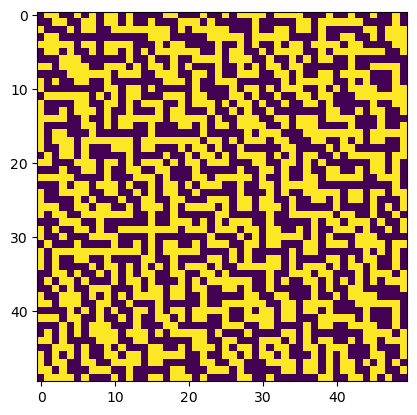

In [172]:
pl.imshow(grid)

In [173]:
def is_wall(x, y):
    value = x * x + 3 * x + 2 * x * y + y + y * y + 1358
    one_bits = bin(value).count('1')
    return one_bits % 2 == 1


traversed = {(1, 1)}
steps = 0
new_places = traversed

part1 = None
part2 = None

while part1 is None or part2 is None:
    places_to_check = new_places.copy()
    new_places = set()
    for old_x, old_y in places_to_check:
        for x, y in [(old_x + 1, old_y), (old_x - 1, old_y), (old_x, old_y + 1), (old_x, old_y - 1)]:
            if x < 0 or y < 0 or (x, y) in traversed or is_wall(x, y):
                continue
            traversed.add((x, y))
            new_places.add((x, y))
    steps += 1
    if (31, 39) in new_places:
        part1 = steps
    if steps == 50:
        part2 = len(traversed)

print(part1)
print(part2)

96
141


# Day 14

In [204]:
salt = "abc"

In [205]:
m = hashlib.md5(salt.encode()).hexdigest()

In [206]:
[m[i] for i in range(len(m) - 2) if m[i] == m[i + 1] == m[i + 2]]

[]